# Factors that influence US home prices

In [1]:
# importing required libraries
import pandas as pd
import requests
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
#api key generated from Fred
api_key = ''  #generate key from https://fred.stlouisfed.org/

In [3]:
# Define the list of series to fetch
series_list = [
    "CSUSHPISA","UNRATE", "GDP", "PERMIT", "POPTHM",
    "JHDUSRGDPBR", "CXUSTATETAXLB1702M", "SPDYNLE00INUSA",
    "MORTGAGE30US", "CPIHOSSL"
]

# Define the list of column names to use
column_names = [
    "Home_Price_Index", "Unemployment_Rate", "GDP", "Building_Permits",
    "Population", "Real_GDP_Growth", "State_Tax_Rate",
    "Life_Expectancy", "30_Year_Mortgage_Rate", "Housing_CPI"
]

In [4]:
# Create an empty DataFrame with a common date index
common_dates = None
df = pd.DataFrame(index=common_dates)

In [5]:
# Define the start and end dates
start_date = '2000-01-01'
end_date = '2023-12-31'

# Fetch data for each series and add it to the DataFrame
for i, series in enumerate(series_list):
    url = f'https://api.stlouisfed.org/fred/series/observations?series_id={series}&api_key={api_key}&file_type=json&observation_start={start_date}&observation_end={end_date}'
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        observations = data['observations']
        
        # Create a dictionary with date-value pairs
        date_values = {obs['date']: float(obs['value']) if obs['value'] != '.' else None for obs in observations}
        
        # Create a Series from the dictionary and align it with the common date index
        series_data = pd.Series(date_values, name=column_names[i])
        df = df.join(series_data, how='outer')
    else:
        print(f"Failed to fetch data for {series}")


In [6]:
# print result
print(df.head())

            Home_Price_Index  Unemployment_Rate        GDP  Building_Permits  \
2000-01-01           100.551                4.0  10002.179            1727.0   
2000-01-07               NaN                NaN        NaN               NaN   
2000-01-14               NaN                NaN        NaN               NaN   
2000-01-21               NaN                NaN        NaN               NaN   
2000-01-28               NaN                NaN        NaN               NaN   

            Population  Real_GDP_Growth  State_Tax_Rate  Life_Expectancy  \
2000-01-01    281083.0              0.0           681.0        76.636585   
2000-01-07         NaN              NaN             NaN              NaN   
2000-01-14         NaN              NaN             NaN              NaN   
2000-01-21         NaN              NaN             NaN              NaN   
2000-01-28         NaN              NaN             NaN              NaN   

            30_Year_Mortgage_Rate  Housing_CPI  
2000-01-01   

In [7]:
print(df.describe())


       Home_Price_Index  Unemployment_Rate           GDP  Building_Permits  \
count        283.000000         284.000000     94.000000        284.000000   
mean         175.080435           5.793310  16613.797936       1357.989437   
std           48.539071           1.968764   4447.182538        457.653591   
min          100.551000           3.400000  10002.179000        513.000000   
25%          142.405000           4.400000  13392.943000       1026.250000   
50%          167.335000           5.300000  15744.969500       1347.500000   
75%          193.215000           6.700000  19629.107000       1692.750000   
max          306.720000          14.700000  27063.012000       2263.000000   

          Population  Real_GDP_Growth  State_Tax_Rate  Life_Expectancy  \
count     283.000000        93.000000       23.000000        22.000000   
mean   311546.162544         0.129032     1577.043478        77.933592   
std     16478.919037         0.337053     1118.654447         0.827505   
m

In [8]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values
df = df.interpolate(method='linear')


Home_Price_Index         1201
Unemployment_Rate        1200
GDP                      1390
Building_Permits         1200
Population               1201
Real_GDP_Growth          1391
State_Tax_Rate           1461
Life_Expectancy          1462
30_Year_Mortgage_Rate     245
Housing_CPI              1200
dtype: int64


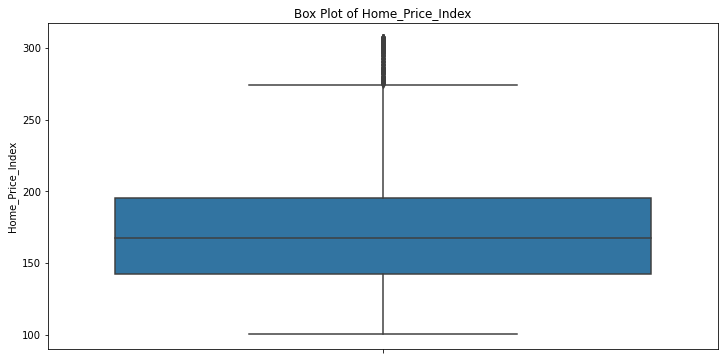

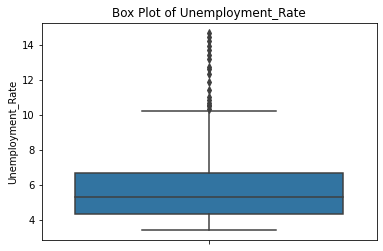

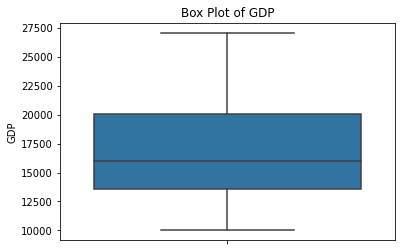

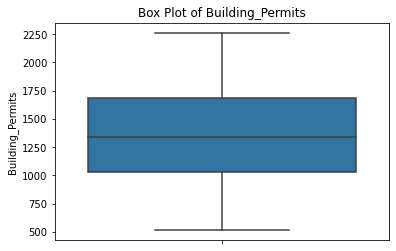

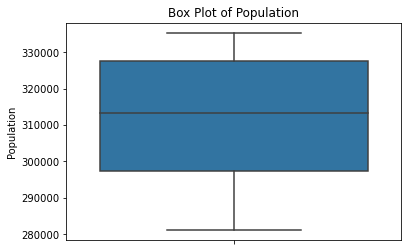

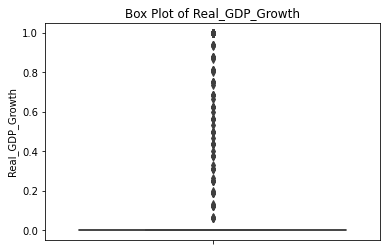

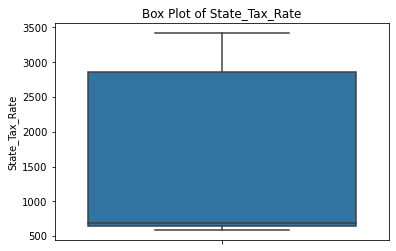

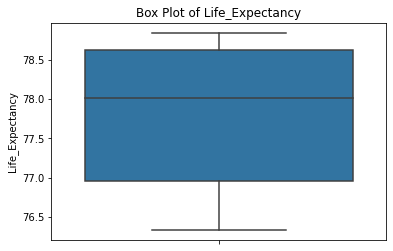

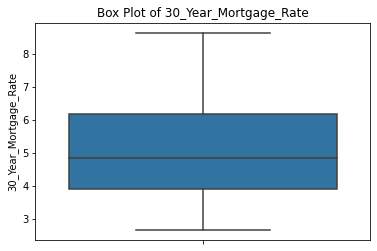

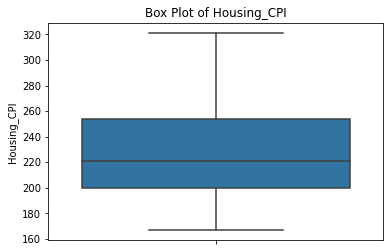

In [9]:
# Box plots for outlier detection
plt.figure(figsize=(12, 6))
for column in df.columns:
    sns.boxplot(data=df, y=column)
    plt.title(f'Box Plot of {column}')
    plt.show()

In [10]:
# Calculate IQR for Home_Price_Index
q1 = df['Home_Price_Index'].quantile(0.25)
q3 = df['Home_Price_Index'].quantile(0.75)
iqr = q3 - q1

# Define lower and upper bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Remove outliers
df = df[(df['Home_Price_Index'] >= lower_bound) & (df['Home_Price_Index'] <= upper_bound)]


In [11]:
# Calculate IQR for Unemployment_Rate
q1 = df['Unemployment_Rate'].quantile(0.25)
q3 = df['Unemployment_Rate'].quantile(0.75)
iqr = q3 - q1

# Define lower and upper bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Remove outliers
df = df[(df['Unemployment_Rate'] >= lower_bound) & (df['Unemployment_Rate'] <= upper_bound)]


In [12]:
# Calculate IQR for Real_GDP_Growth
q1 = df['Real_GDP_Growth'].quantile(0.25)
q3 = df['Real_GDP_Growth'].quantile(0.75)
iqr = q3 - q1

# Define lower and upper bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Remove outliers
df = df[(df['Real_GDP_Growth'] >= lower_bound) & (df['Real_GDP_Growth'] <= upper_bound)]


In [13]:
# Calculate IQR for 30_Year_Mortgage_Rate
q1 = df['30_Year_Mortgage_Rate'].quantile(0.25)
q3 = df['30_Year_Mortgage_Rate'].quantile(0.75)
iqr = q3 - q1

# Define lower and upper bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Remove outliers
df = df[(df['30_Year_Mortgage_Rate'] >= lower_bound) & (df['30_Year_Mortgage_Rate'] <= upper_bound)]


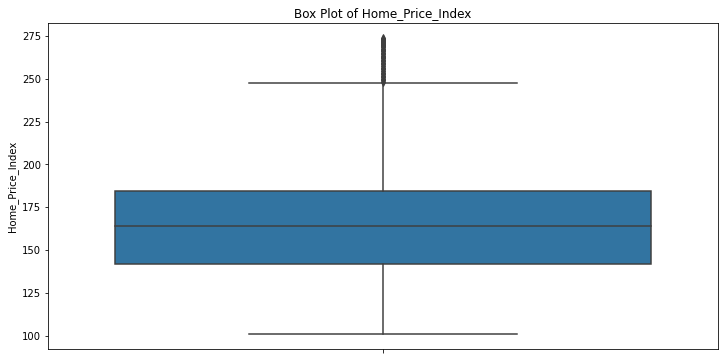

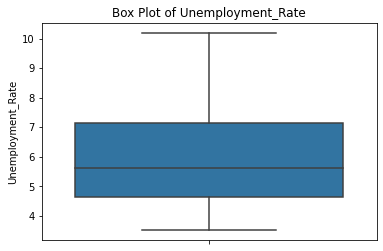

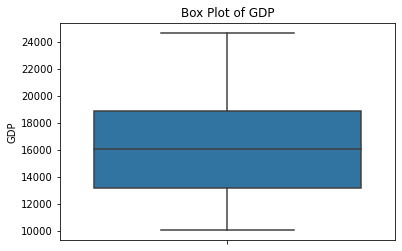

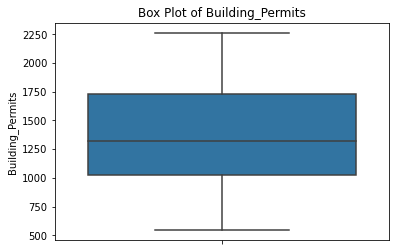

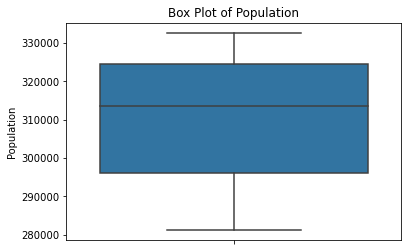

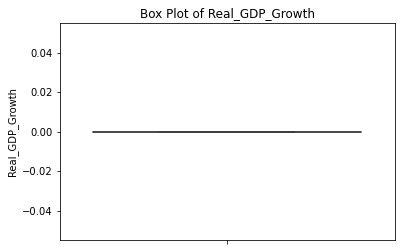

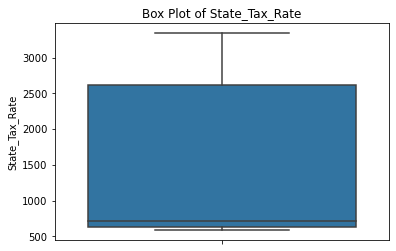

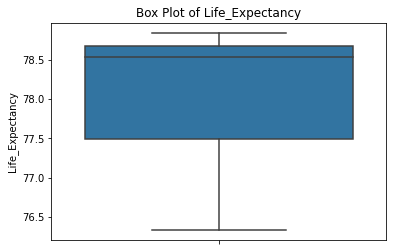

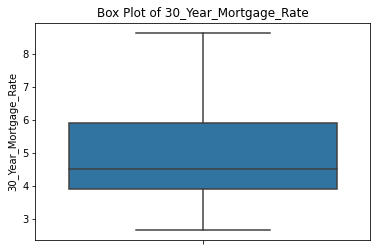

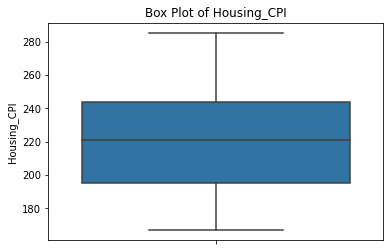

In [33]:
# Box plots for outlier detection
plt.figure(figsize=(12, 6))
for column in df.columns:
    sns.boxplot(data=df, y=column)
    plt.title(f'Box Plot of {column}')
    plt.show()

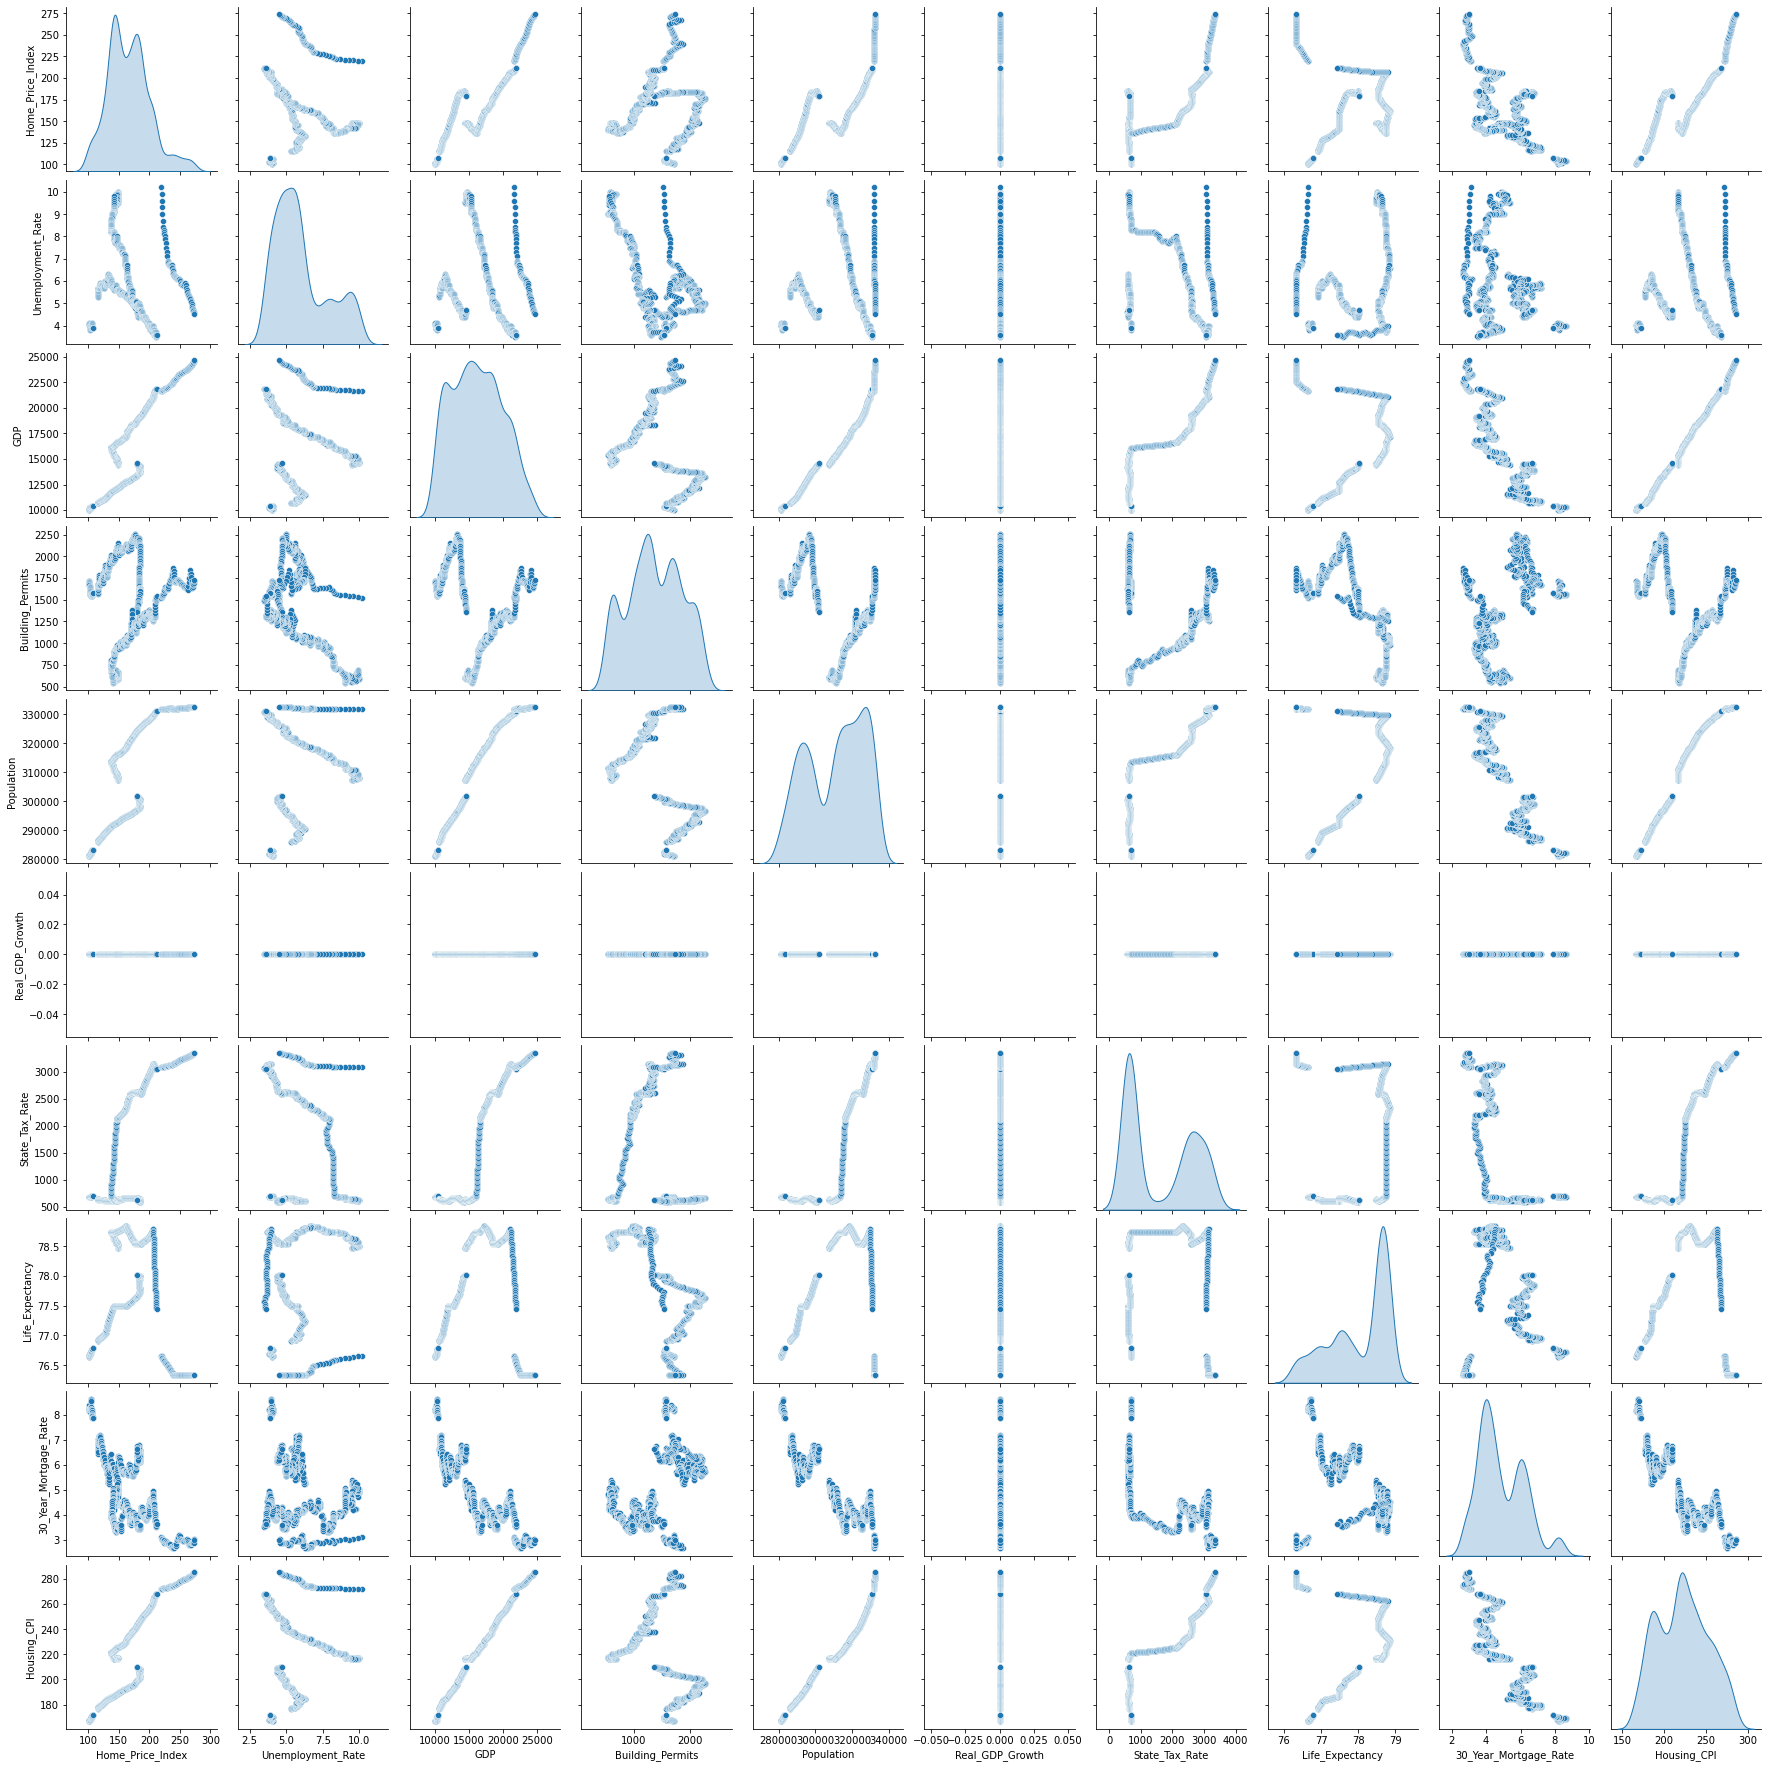

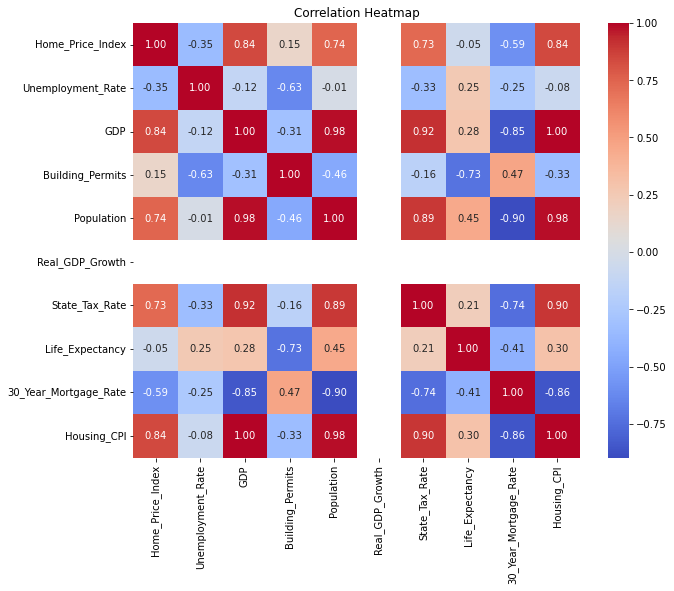

In [15]:
# Pairplot
sns.pairplot(df, diag_kind='kde')
plt.show()

# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


## Relationship Between Home Price Index and Economic Indicators


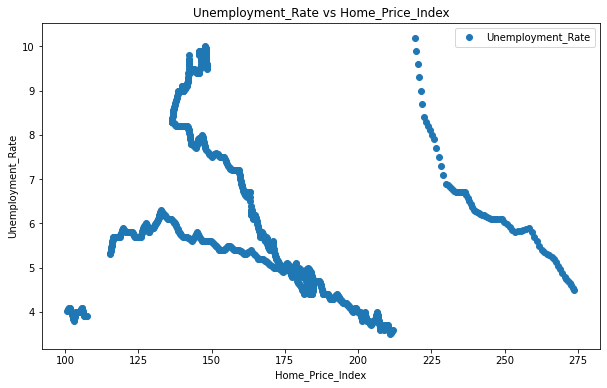

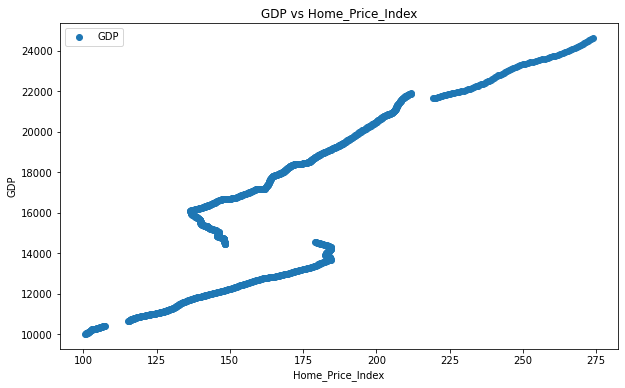

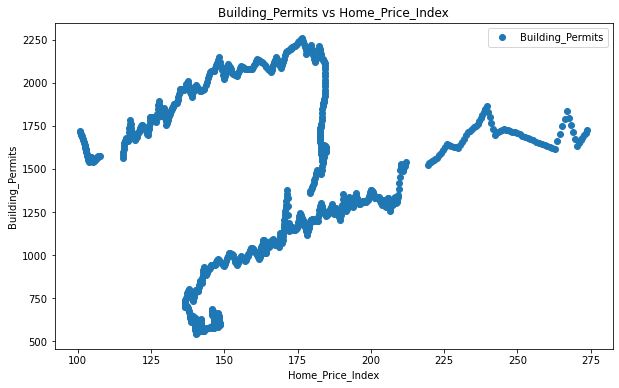

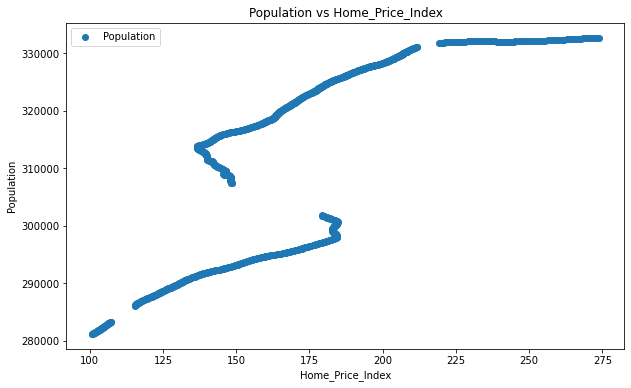

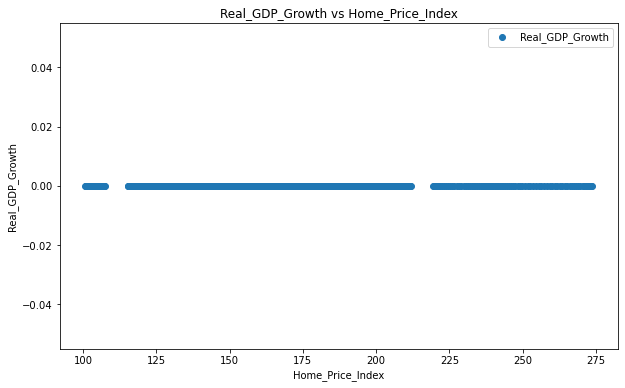

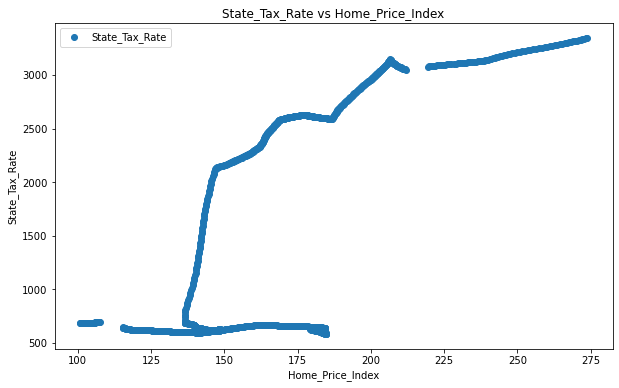

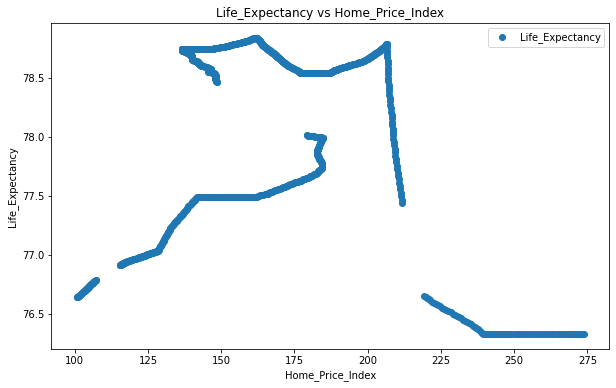

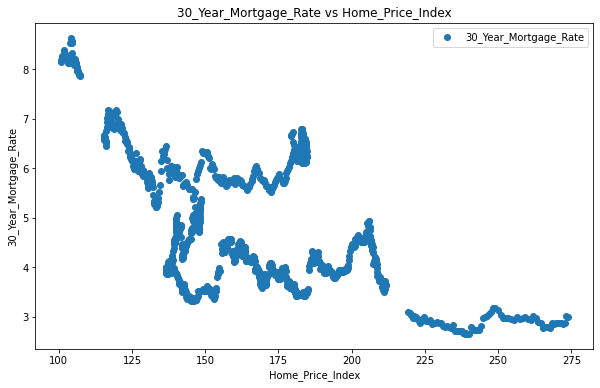

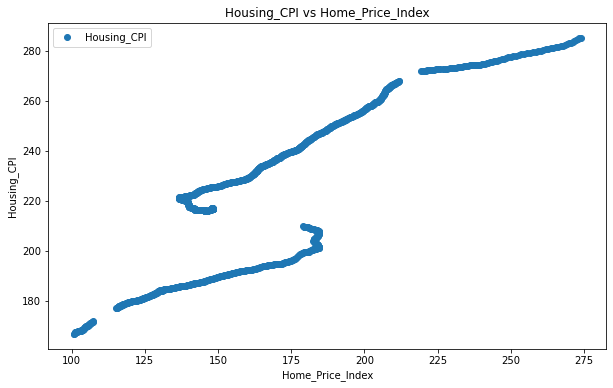

In [16]:
# Select the columns you want to plot
y_columns = ["Unemployment_Rate", "GDP", "Building_Permits", "Population", "Real_GDP_Growth",
             "State_Tax_Rate", "Life_Expectancy", "30_Year_Mortgage_Rate", "Housing_CPI"]

# Plot each column against the Home_Price_Index
for column in y_columns:
    plt.figure(figsize=(10, 6))  # Create a new figure
    plt.scatter(df["Home_Price_Index"], df[column], label=column)
    plt.xlabel("Home_Price_Index")
    plt.ylabel(column)
    plt.title(f"{column} vs Home_Price_Index")
    plt.legend()

# Show the plots
plt.show()

## Analysis of Factors Affecting Home Price Index (HPI)

1. **Unemployment Rate**: Higher unemployment rates are generally associated with lower HPI values. This is because high unemployment can lead to reduced demand for homes.

2. **GDP**: A higher Gross Domestic Product (GDP) tends to result in lower HPI values, as a strong economy can drive up demand for housing.

3. **Building Permits**: Building permits can affect HPI in complex ways. An increase in permits can lead to increased supply, but the impact on HPI depends on the existing market conditions.

4. **Population**: An increase in population often leads to higher HPI, as more people require housing.

5. **State Tax Rate**: Higher state tax rates can contribute to an increase in HPI, as areas with better public services tend to attract more homebuyers.

6. **Life Expectancy**: The relationship between life expectancy and HPI may be indirect and influenced by various other factors.

7. **30-Year Mortgage Rate**: Higher mortgage rates are typically associated with lower HPI, as they can discourage potential buyers.

8. **Housing CPI**: Housing Consumer Price Index (CPI) tends to increase with HPI, reflecting the rising cost of housing.


## Line Plots with Multiple Axes:


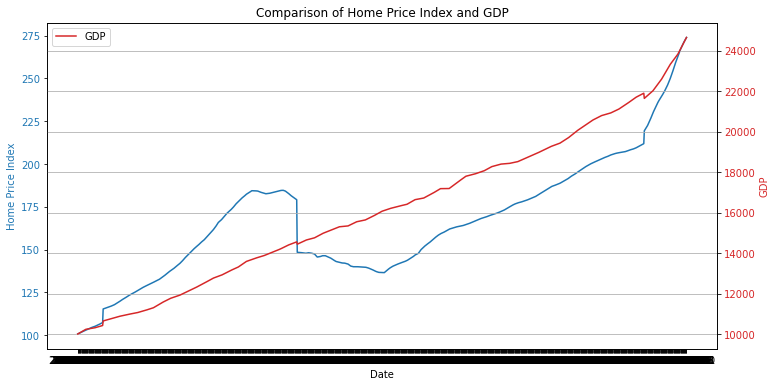

In [17]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Home Price Index
ax1.set_xlabel('Date')
ax1.set_ylabel('Home Price Index', color='tab:blue')
ax1.plot(df.index, df['Home_Price_Index'], color='tab:blue', label='Home Price Index')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for another economic indicator (e.g., GDP)
ax2 = ax1.twinx()
ax2.set_ylabel('GDP', color='tab:red')
ax2.plot(df.index, df['GDP'], color='tab:red', label='GDP')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Comparison of Home Price Index and GDP')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


## Seasonal Decomposition

## Findings: Home Price Index (HPI) and Gross Domestic Product (GDP) Trends

Our analysis reveals key trends in the Home Price Index (HPI) and Gross Domestic Product (GDP) over time. Here are the main findings:

### HPI Dynamics

- **Overall Increasing Trend**: Over the observed period, the Home Price Index shows a consistent upward trajectory, indicating a general appreciation in home values.

- **Temporary Decrease**: Notably, there was a brief period where the HPI experienced a decrease. This dip in home prices may be attributed to specific market factors or economic events.

- **Recovery Phase**: Encouragingly, the HPI rebounded after this temporary setback, gradually returning to its upward trend. This recovery suggests resilience in the housing market.

### Consistent GDP Growth

- **Sustained Expansion**: In contrast to HPI fluctuations, Gross Domestic Product (GDP) consistently demonstrates growth throughout the observed period. This indicates a robust and continuous expansion of the overall economy.

- **Stability in Economic Performance**: The persistent GDP growth reflects economic stability and suggests that macroeconomic factors are positively influencing economic activity.

These findings underscore the complex interplay between the housing market, as represented by the HPI, and broader economic trends, as captured by GDP. While the HPI experienced short-term fluctuations, the GDP maintained a more stable growth trajectory. Further analysis is needed to explore the underlying factors driving these trends and their implications for the real estate and economic landscape.


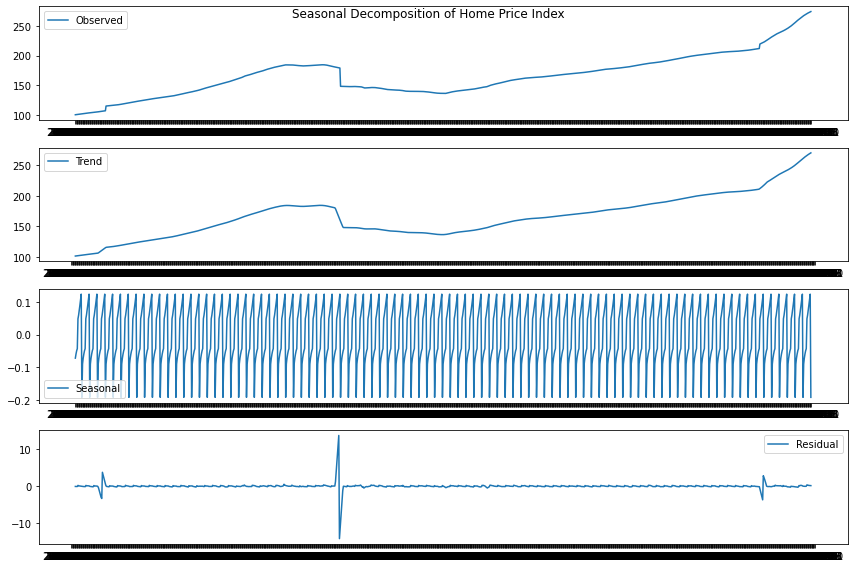

In [18]:
# Create a temporary DataFrame for seasonal decomposition
temp_df = df.copy()

# Remove rows with missing values from the temporary DataFrame
temp_df.dropna(subset=['Home_Price_Index'], inplace=True)

# Perform seasonal decomposition on the temporary DataFrame
decomposition = seasonal_decompose(temp_df['Home_Price_Index'], model='additive', period=12)  # Adjust the period as needed

# Plot the decomposed components
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(temp_df.index, decomposition.observed, label='Observed')
plt.legend()

plt.subplot(412)
plt.plot(temp_df.index, decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(temp_df.index, decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(temp_df.index, decomposition.resid, label='Residual')
plt.legend()

plt.tight_layout()
plt.suptitle('Seasonal Decomposition of Home Price Index')
plt.show()


## Rolling Correlation

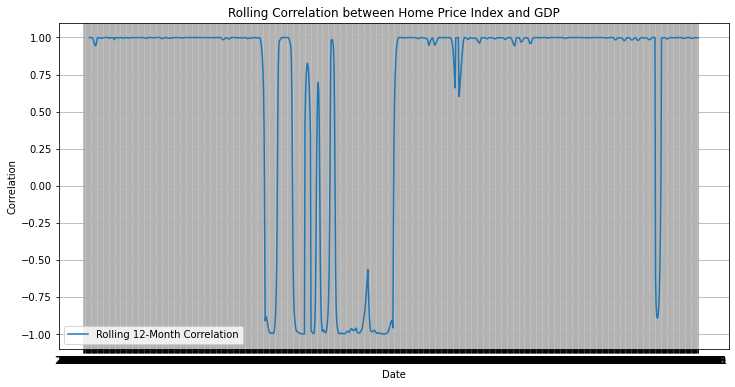

In [19]:
rolling_window = 12  # Adjust the window size as needed

# Calculate rolling correlations
rolling_correlation = df['Home_Price_Index'].rolling(rolling_window).corr(df['GDP'])

plt.figure(figsize=(12, 6))
plt.plot(df.index, rolling_correlation, label=f'Rolling {rolling_window}-Month Correlation', color='tab:blue')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.title(f'Rolling Correlation between Home Price Index and GDP')
plt.grid(True)
plt.legend()
plt.show()


## Creating model

In [20]:
target_column = "Home_Price_Index"

# Select the columns you want as features (independent variables)
feature_columns = [col for col in df.columns if col != target_column]

# Create the feature matrix X and the target vector y
X = df[feature_columns]  # Features
y = df[target_column]     # Target

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
# Initialize the Linear Regression model
model = LinearRegression()


In [23]:
# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [24]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance using metrics

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# R-squared (R2) Score
r2 = r2_score(y_test, y_pred)

# Mean Squared Logarithmic Error (MSLE)
msle = mean_squared_log_error(y_test, y_pred)

In [25]:
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2) Score: {r2}')
print(f'Mean Squared Logarithmic Error (MSLE): {msle}')

Mean Absolute Error (MAE): 5.1758979217401
Mean Squared Error (MSE): 39.23906032688271
Root Mean Squared Error (RMSE): 6.264108901263029
R-squared (R2) Score: 0.9650818918825833
Mean Squared Logarithmic Error (MSLE): 0.0013095220264404326


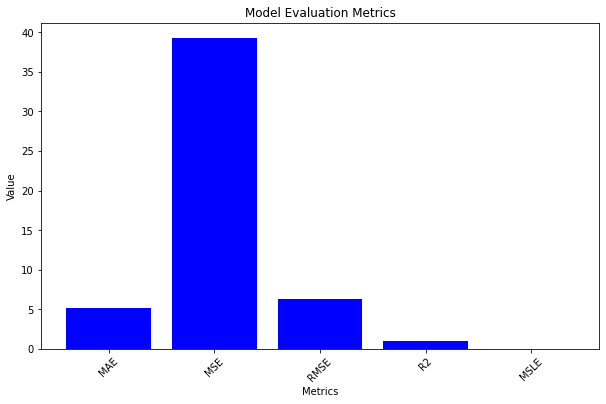

In [26]:
# Calculate the metrics
metrics_labels = ["MAE", "MSE", "RMSE", "R2", "MSLE"]
metrics_values = [mae, mse, rmse, r2, msle]

# Create a bar chart for the metrics
plt.figure(figsize=(10, 6))
plt.bar(metrics_labels, metrics_values, color='blue')
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Model Evaluation Metrics')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

## Fututre Prediction

In [27]:
last_date = df.index[-1]  # Assuming your DataFrame has a datetime index
future_dates = pd.date_range(last_date, periods=5*12, freq='M')  # Creates a date range for the next 5 years (5 * 12 months)

In [28]:
# Define the number of future months for which you want to predict (5 years * 12 months)
num_future_months = 5 * 12

# finding the last date.
last_date = df.index[-1]

# Create a list of future dates starting from the last date in your current data
future_dates = pd.date_range(last_date, periods=num_future_months + 1, freq='M')

# Create a DataFrame with the same columns as your original feature matrix (X)
future_X = pd.DataFrame(columns=feature_columns, index=future_dates)

# Fill in the future_X DataFrame with extrapolated or assumed values for each feature

for feature in feature_columns:
    # Get the last known value of the feature
    last_known_value = df[feature].iloc[-1]
    
    # Generate linearly extrapolated values for the next 5 years
    extrapolated_values = np.linspace(last_known_value, last_known_value * 1.05, num_future_months + 1)  # Adjust the multiplier as needed
    
    # Fill in the future_X DataFrame with extrapolated values
    future_X[feature] = extrapolated_values


# Now, `future_X` contains the feature data for predicting future home prices.


In [29]:
future_predictions = model.predict(future_X)

In [30]:
future_predictions_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Home_Price': future_predictions
})

# Set the Date column as the index
future_predictions_df.set_index('Date', inplace=True)


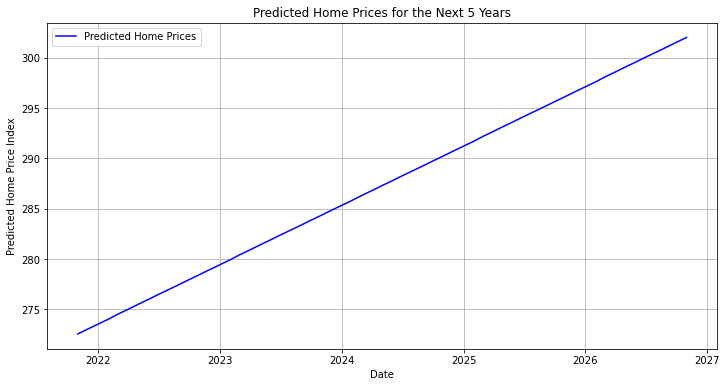

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(future_predictions_df.index, future_predictions_df['Predicted_Home_Price'], label='Predicted Home Prices', color='blue')
plt.xlabel('Date')
plt.ylabel('Predicted Home Price Index')
plt.title('Predicted Home Prices for the Next 5 Years')
plt.grid(True)
plt.legend()
plt.show()